In [4]:
#需要排序好的药物IC50信息用于评估其分布
import pandas as pd
data = pd.read_csv("drug_IC50.csv",sep=",")
print (data["LN_IC50"])

0     -2.138992
1     -1.638333
2     -1.502541
3     -1.432912
4     -0.948428
         ...   
870    6.296379
871    6.358280
872    6.470565
873    7.207566
874    7.275563
Name: LN_IC50, Length: 875, dtype: float64


y=0.0046*x+-0.0098
得分 0.8938495514206775


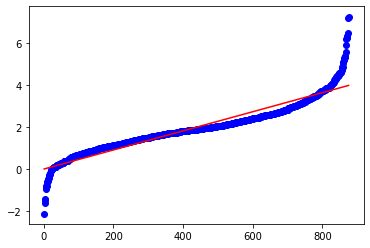

In [5]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
X = data["DATASET"]
Y = data["LN_IC50"]
X_train = X.values.reshape(-1,1)
Y_train = Y.values.reshape(-1,1)
lineModel = LinearRegression()
lineModel.fit(X_train, Y_train)
 
#用训练后的模型，进行预测
Y_predict = lineModel.predict(X_train)
 
#coef_是系数，intercept_是截距
a1 = lineModel.coef_[0][0]
b = lineModel.intercept_[0]
print("y=%.4f*x+%.4f" % (a1,b))
 
#对回归模型进行评分，这里简单使用训练集进行评分，实际很多时候用其他的测试集进行评分
print("得分", lineModel.score(X_train, Y_train))
 
#简单画图显示
plt.scatter(X, Y, c="blue")
plt.plot(X_train,Y_predict, c="red")
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0.9498513242223867
0.010771802059496568
-2.1497638020594967


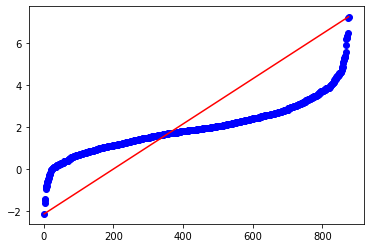

zb
5.629568000000001
9.414555
523
0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
870    0.0
871    0.0
872    0.0
873    0.0
874    0.0
Name: LN_IC50, Length: 875, dtype: float64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [6]:
from scipy.stats import pearsonr
import numpy as np
y_pre = data["LN_IC50"]
output = data["LN_IC50"]
data_y = pd.read_csv("drug_IC50.csv",sep=",")
# Define an object containing observations that are not NA
for i in range(0,len(Y_predict)-1):
    y_pre[i] = Y_predict[i]
    
pearson = pearsonr(data_y["LN_IC50"],y_pre)
print(pearson[0])
if(pearson[0]>0.98):
    for i in range(0,len(Y_predict)):
        if(i<(len(Y_predict)/2)):
            output[i] = 1
        else:
            output[i] = 0
else:
    data = pd.read_csv("drug_IC50.csv",sep=",")
    lin = 0
    zb = 0
    y_pre = data["LN_IC50"]
    X= [data["DATASET"][0],data["DATASET"][len(Y_predict)-1]]
    Y = [data["LN_IC50"][0],data["LN_IC50"][len(Y_predict)-1]]
    a1 = (Y[1]-Y[0])/(X[1]-X[0])
    b = Y[0]-a1
    print(a1)
    print(b)
    for i in range(0,len(data["LN_IC50"])):
        y_pre[i] = a1*i+b
    data2 = pd.read_csv("drug_IC50.csv",sep=",")
    plt.scatter(data2["DATASET"],data2["LN_IC50"], c="blue")
    plt.plot(data["DATASET"],y_pre, c="red")
    plt.show()
    data_2 = pd.read_csv("drug_IC50.csv",sep=",")
    for i in range(0,len(Y_predict)-1):
        y_pre[i] = a1*i+b
        cun = abs(y_pre[i]-data_2["LN_IC50"][i])
        #print(cun)
        if(cun>lin):
            zb = i
            #print(zb)
            lin = cun
    
    #zb = 68
    #cun = abs(y_pre[zb]-data_2["LN_IC50"][zb])
    #lin = abs(y_pre[zb]-data_2["LN_IC50"][zb])
    print("zb")
    #print(data_2["LN_IC50"][zb])
    a = abs(data_2["LN_IC50"][0]-data_2["LN_IC50"][zb])
    b = abs(data_2["LN_IC50"][0]-data_2["LN_IC50"][len(data_2["LN_IC50"])-1])
    print(a)
    print(b)
    #y = len(data_2["LN_IC50"])*(data_2["LN_IC50"][zb]/data_2["LN_IC50"][len(data_2["LN_IC50"])-1])
    y = len(data_2["LN_IC50"])*(a/b)
    y = abs(int(y))
    print(y)
    for i in range(0,len(Y_predict)):
        if(i<y):
            output[i] = 1
        else:
            output[i] = 0
print(output)
output.to_csv("drug_re.csv",header=0)


In [7]:
#import seaborn as sns
#tux = pd.read_csv("tu.csv",sep=",")
#sns.set(style="whitegrid")
#tips = sns.load_dataset("tips")
#ax = sns.violinplot(y=data_y["IC50"], hue=output, palette="muted", split=True)
#print(tips)
#ax = sns.violinplot(x="DAY", y="IC50", hue="RE",data=tux, palette="muted", split=True)
len(data_2["LN_IC50"])
y_pre[68]

-1.41728126201373

In [16]:
y = len(data_2["LN_IC50"])*(data_2["LN_IC50"][zb]/data_2["LN_IC50"][len(data_2["LN_IC50"])-1])
y = int(y)
print(y)

84


In [22]:
y_pre[933]


2.3781655273311877

In [24]:
y_pre[0]

-8.38443047266881

In [ ]:
for i in range(0,len(data["IC50"]-1)):
    
    y_pre[i] = a1*i+b
    if(abs(y_pre[i]-data["IC50"][i])>lin):
        zb = i
        lin = abs(y_pre[i]-data["IC50"][i])
print(zb)
data2 = pd.read_csv("data1.csv",sep=",")
plt.scatter(data2["ICY"],data2["IC50"], c="blue")
plt.plot(data["ICY"],y_pre, c="red")
plt.show()

In [123]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv("data1.csv",sep=",")
lin = 0
zb = 0
y_pre = data["IC50"]
X= [data["ICY"][0],data["ICY"][len(Y_predict)-1]]
Y = [data["IC50"][0],data["IC50"][len(Y_predict)-1]]
a1 = (Y[1]-Y[0])/(X[1]-X[0])
b = Y[0]-a1
print(a1)
print(b)
for i in range(0,len(data["IC50"])):
    
    y_pre[i] = a1*i+b
data2 = pd.read_csv("data1.csv",sep=",")
plt.scatter(data2["ICY"],data2["IC50"], c="blue")
plt.plot(data["ICY"],y_pre, c="red")
plt.show()
data_2 = pd.read_csv("data1.csv",sep=",")
for i in range(0,len(Y_predict)):
    y_pre[i] = a1*i+b
    cun = abs(y_pre[i]-data_2["IC50"][i])
    if(cun>lin):
        zb = i
        lin = cun
print(zb)

1


In [ ]:
X= [data["ICY"][0],data["ICY"][len(Y_predict)-1]]
Y = [data["IC50"][0],data["IC50"][len(Y_predict)-1]]
print(X)
print(Y)